In [53]:
import geopandas as gpd
from bokeh.plotting import save, figure
from bokeh.models import GeoJSONDataSource

# File path
points_fp = r"C:/Users/jwhoj/Desktop/address/address.shp"

# Read the data
points = gpd.read_file(points_fp)

In [19]:
points.head(2)

,COMMENTS,SITETYPE,Alias1,Alias2,Alias3,Alias4,Alias5,SITEID,ADDR_HN,ADDR_PD,...,PRIM_ADDR,PRIM_ADDR_,SITETYPE_D,POINT_X,POINT_Y,COUNTY,MAJOR,MINOR,PIN,geometry
0,aa update 5/22/18,R1,None,None,None,None,None,1259735.0,4744,None,...,1,ESITE:ONETOONE,Single Family,1.300281e+06,162418.196943,KING,941540,0200,9415400200,POINT (1300281.368185133 162418.1969427317)
1,aa update 5/22/18,R1,None,None,None,None,None,1259727.0,4741,None,...,1,ESITE:ONETOONE,Single Family,1.299970e+06,162288.037426,KING,941540,0040,9415400040,POINT (1299969.733309716 162288.0374261439)


In [52]:
points = points.to_crs({'init': 'epsg:4326'})
points.head(2)

,COMMENTS,SITETYPE,Alias1,Alias2,Alias3,Alias4,Alias5,SITEID,ADDR_HN,ADDR_PD,...,SITETYPE_D,POINT_X,POINT_Y,COUNTY,MAJOR,MINOR,PIN,geometry,x,y
0,aa update 5/22/18,R1,None,None,None,None,None,1259735.0,4744,None,...,Single Family,1.300281e+06,162418.196943,KING,941540,0200,9415400200,POINT (-122.207753651528 47.43693335982567),-122.207754,47.436933
1,aa update 5/22/18,R1,None,None,None,None,None,1259727.0,4741,None,...,Single Family,1.299970e+06,162288.037426,KING,941540,0040,9415400040,POINT (-122.2090032382582 47.43656132166689),-122.209003,47.436561


In [21]:
def getPointCoords(row, geom, coord_type):
    """Calculates coordinates ('x' or 'y') of a Point geometry"""
    if coord_type == 'x':
        return row[geom].x
    elif coord_type == 'y':
        return row[geom].y

In [22]:
# Calculate x coordinates
points['x'] = points.apply(getPointCoords, geom='geometry', coord_type='x', axis=1)

# Calculate y coordinates
points['y'] = points.apply(getPointCoords, geom='geometry', coord_type='y', axis=1)

# Let's see what we have now
points.head()

,COMMENTS,SITETYPE,Alias1,Alias2,Alias3,Alias4,Alias5,SITEID,ADDR_HN,ADDR_PD,...,SITETYPE_D,POINT_X,POINT_Y,COUNTY,MAJOR,MINOR,PIN,geometry,x,y
0,aa update 5/22/18,R1,None,None,None,None,None,1259735.0,4744,None,...,Single Family,1.300281e+06,162418.196943,KING,941540,0200,9415400200,POINT (-122.207753651528 47.43693335982567),-122.207754,47.436933
1,aa update 5/22/18,R1,None,None,None,None,None,1259727.0,4741,None,...,Single Family,1.299970e+06,162288.037426,KING,941540,0040,9415400040,POINT (-122.2090032382582 47.43656132166689),-122.209003,47.436561
2,aa update 5/22/18,R1,None,None,None,None,None,1259730.0,4759,None,...,Single Family,1.299973e+06,162139.285755,KING,941540,0070,9415400070,POINT (-122.2089804745519 47.43615373176346),-122.208980,47.436154
3,aa update 5/22/18,R1,None,None,None,None,None,1259731.0,4765,None,...,Single Family,1.299968e+06,162087.222867,KING,941540,0080,9415400080,POINT (-122.2089977447786 47.43601076970904),-122.208998,47.436011
4,aa update 5/22/18,R1,None,None,None,None,None,1259738.0,4762,None,...,Single Family,1.300142e+06,162218.868929,KING,941540,0140,9415400140,POINT (-122.2083011489013 47.43638018095467),-122.208301,47.436380


In [24]:
# Make a copy and drop the geometry column
p_df = points.drop('geometry', axis=1).copy()

# See head
p_df.head(2)

,COMMENTS,SITETYPE,Alias1,Alias2,Alias3,Alias4,Alias5,SITEID,ADDR_HN,ADDR_PD,...,PRIM_ADDR_,SITETYPE_D,POINT_X,POINT_Y,COUNTY,MAJOR,MINOR,PIN,x,y
0,aa update 5/22/18,R1,None,None,None,None,None,1259735.0,4744,None,...,ESITE:ONETOONE,Single Family,1.300281e+06,162418.196943,KING,941540,0200,9415400200,-122.207754,47.436933
1,aa update 5/22/18,R1,None,None,None,None,None,1259727.0,4741,None,...,ESITE:ONETOONE,Single Family,1.299970e+06,162288.037426,KING,941540,0040,9415400040,-122.209003,47.436561


In [42]:
# Type of property
points['SITETYPE_D'].head()

0    Single Family
1    Single Family
2    Single Family
3    Single Family
4    Single Family
Name: SITETYPE_D, dtype: object

In [26]:
from bokeh.models import ColumnDataSource
# Point DataSource
psource = ColumnDataSource(p_df)

In [28]:
# Initialize our plot figure
p = figure(title="A map of address points from a Shapefile")

# Add the points to the map from our 'psource' ColumnDataSource -object
p.circle('x', 'y', source=psource, color='red', size=10)

GlyphRenderer(id='1166', ...)

In [30]:
# Output filepath
outfp = r"C:/Users/jwhoj/Desktop/point_map.html"

# Save the map
save(p, outfp)

'C:\\Users\\jwhoj\\Desktop\\point_map.html'

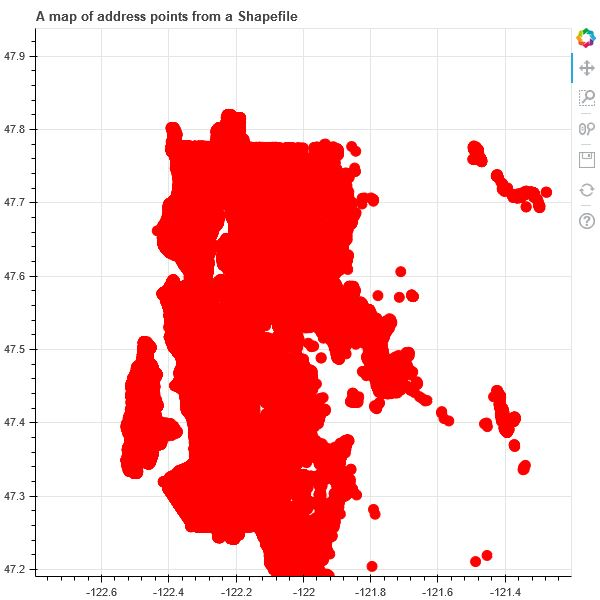

In [31]:
from IPython.display import Image
img = 'C:/Users/jwhoj/Desktop/shapefile_address.jpg'
Image(filename=img)

In [34]:
# Create hover tool
from bokeh.models import HoverTool

In [35]:
my_hover = HoverTool()

In [47]:
# Investigate property type of address point (single family, multi-family, accessory building)
my_hover.tooltips = [('Property type of the point', '@SITETYPE_D')]

In [48]:
p.add_tools(my_hover)

In [49]:
# Enhanced version w/ hover tool 
# File path
outfp = r"C:/Users/jwhoj/Desktop/point_map_hover.html"

save(p, outfp)

'C:\\Users\\jwhoj\\Desktop\\point_map_hover.html'

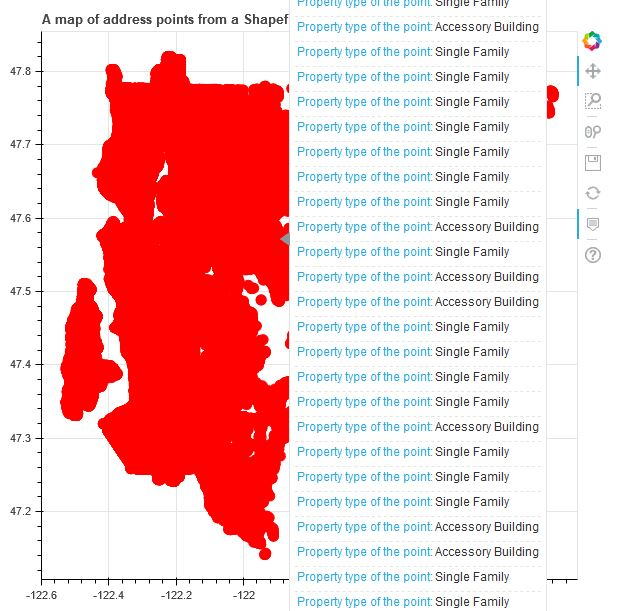

In [51]:
from IPython.display import Image
img = 'C:/Users/jwhoj/Desktop/address_hover.jpg'
Image(filename=img)